In [145]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd

In [146]:
from sklearn.datasets import fetch_california_housing

california_housing = fetch_california_housing(as_frame=True)

In [147]:
california_housing

{'data':        MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
 0      8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
 1      8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
 2      7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
 3      5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
 4      3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
 ...       ...       ...       ...        ...         ...       ...       ...   
 20635  1.5603      25.0  5.045455   1.133333       845.0  2.560606     39.48   
 20636  2.5568      18.0  6.114035   1.315789       356.0  3.122807     39.49   
 20637  1.7000      17.0  5.205543   1.120092      1007.0  2.325635     39.43   
 20638  1.8672      18.0  5.329513   1.171920       741.0  2.123209     39.43   
 20639  2.3886      16.0  5.254717   1.162264      1387.0  2.616981     39.37   
 
        Longitude 

In [148]:
X = pd.DataFrame(california_housing.data)
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [149]:
y = california_housing.target
np.array(y)

array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894])

In [150]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [151]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [152]:
X_train = scaler.fit_transform(X_train)

In [153]:
X_test = scaler.transform(X_test)

In [154]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train, y_train)

In [155]:
reg_pred = reg.predict(X_test)

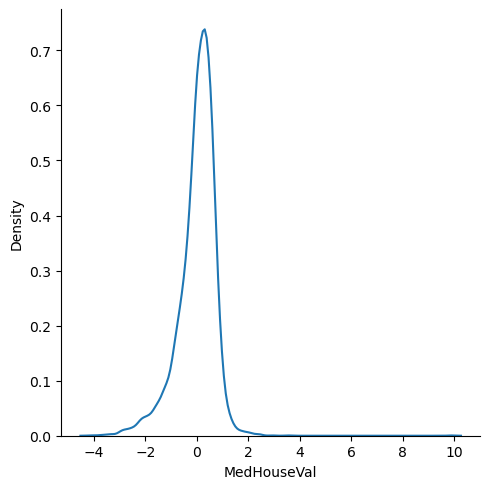

In [156]:
sns.displot(reg_pred-y_test,kind='kde')

In [157]:
from sklearn.metrics import r2_score

In [160]:
from sklearn.metrics import r2_score
score= r2_score(reg_pred,y_test)
score

0.34513393809439674

In [161]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, reg_pred)

0.5305677824766754

In [167]:
from sklearn.model_selection import cross_val_score
mse = cross_val_score(reg,X_train,y_train,scoring= 'neg_mean_squared_error',cv=10)

print(np.mean(mse))

-0.5257104326777
